In [1]:
## This will take a while
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import plotly.offline as py


# Set a seed for reproducibility
np.random.seed(42)


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Import the datasets

# Gun incidents data
df_incidents_cleaned = pd.read_hdf('../ds/cleaned/reduced_for_clustering.h5', key = 'df')

# Visualize data table
df_incidents_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 131618 entries, 0 to 134578
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       131618 non-null  datetime64[ns]
 1   state                      131618 non-null  object        
 2   city_or_county             131618 non-null  object        
 3   latitude                   131618 non-null  float64       
 4   longitude                  131618 non-null  float64       
 5   congressional_district     131618 non-null  int64         
 6   participant_age_group1     131618 non-null  category      
 7   participant_gender1        131618 non-null  category      
 8   avg_age_participants       131618 non-null  int64         
 9   n_participants_child       131618 non-null  int64         
 10  n_participants_teen        131618 non-null  int64         
 11  n_females                  131618 non-null  int64   

# Take only years from 2014 to 2017 in date column



In [3]:
# Take 2014-17 by considering data from 2014-01-01 to 2017-12-31

df_incidents_cleaned = df_incidents_cleaned[df_incidents_cleaned['date'] >= '2014-01-01']
df_incidents_cleaned = df_incidents_cleaned[df_incidents_cleaned['date'] <= '2017-12-31']

# Visualize data table trough years
df_incidents_cleaned.head(-1)

,date,state,city_or_county,latitude,longitude,congressional_district,participant_age_group1,participant_gender1,avg_age_participants,n_participants_child,...,povertyPercentage,party,candidatevotes,totalvotes,ratio_killed,death_level,percentage_injured,unharmed_ratio,density_incident_state,males_to_females_ratio
0,2014-01-01,Arkansas,Pine Bluff,34.2291,-91.9779,4,Adult 18+,Male,26,0,...,16.8,REPUBLICAN,110789.0,206131.0,0.0,No deaths,58.789954,2.345189,0.136149,2.0
1,2014-01-01,California,Bakersfield,35.3229,-119.0380,23,Adult 18+,Male,28,0,...,14.5,REPUBLICAN,100317.0,134043.0,0.0,No deaths,45.310907,2.345189,0.639968,2.0
2,2014-01-01,Iowa,Iowa City,41.6611,-91.5302,2,Adult 18+,Female,35,0,...,10.1,DEMOCRAT,143431.0,273329.0,0.0,No deaths,71.662763,2.345189,0.096973,0.0
3,2014-01-01,New York,Brooklyn,40.6505,-73.9573,9,Adult 18+,Male,29,0,...,13.4,DEMOCRAT,70997.0,101606.0,0.0,No deaths,70.237122,2.345189,0.534650,2.0
4,2014-01-01,Colorado,Grand Junction,39.0496,-108.5250,3,Adult 18+,Male,47,0,...,10.2,REPUBLICAN,163011.0,281141.0,1.0,All deaths,43.229167,2.345189,0.097775,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127302,2017-12-31,Illinois,Decatur,39.8534,-89.0395,13,Adult 18+,Male,25,0,...,10.4,REPUBLICAN,187583.0,314394.0,0.0,No deaths,80.447516,10.512655,1.000000,1.0
127303,2017-12-31,Tennessee,Nashville,36.2070,-86.7916,5,Adult 18+,Male,22,0,...,12.1,DEMOCRAT,171111.0,273544.0,0.5,Some deaths,56.500000,10.512655,0.293607,2.0
127304,2017-12-31,California,Vallejo,38.1098,-122.2380,5,Adult 18+,Male,31,0,...,11.4,DEMOCRAT,224526.0,292091.0,0.0,No deaths,45.310907,10.512655,0.639968,1.0
127306,2017-12-31,Ohio,Groveport,39.8940,-82.8927,3,Adult 18+,Female,31,0,...,12.4,DEMOCRAT,199791.0,291351.0,0.5,Some deaths,59.958290,10.512655,0.465161,1.0


In [4]:
# how many independent 
df_incidents_cleaned['party'].value_counts()

DEMOCRAT      71793
REPUBLICAN    53664
Name: party, dtype: int64

In [5]:
df_incidents_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125457 entries, 0 to 127311
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       125457 non-null  datetime64[ns]
 1   state                      125457 non-null  object        
 2   city_or_county             125457 non-null  object        
 3   latitude                   125457 non-null  float64       
 4   longitude                  125457 non-null  float64       
 5   congressional_district     125457 non-null  int64         
 6   participant_age_group1     125457 non-null  category      
 7   participant_gender1        125457 non-null  category      
 8   avg_age_participants       125457 non-null  int64         
 9   n_participants_child       125457 non-null  int64         
 10  n_participants_teen        125457 non-null  int64         
 11  n_females                  125457 non-null  int64   

In [6]:
# convert death level to numeric 0,1,3 for each of those categories in a new column death_level_score
df_incidents_cleaned['death_level']

# if category 1: 0, category 2: 1, category 3: 2
df_incidents_cleaned['death_level_score'] = df_incidents_cleaned['death_level'].map({'No deaths': 0, 'Some deaths': 1, 'All deaths': 2})

In [13]:
df_incidents_cleaned['party_score'] = df_incidents_cleaned['party'].map({'REPUBLICAN': 1, 'DEMOCRAT': 0})

In [14]:
df_incidents_cleaned['danger_score'] = (df_incidents_cleaned['death_level_score'].astype(float) + df_incidents_cleaned['density_incident_state']) + df_incidents_cleaned['party_score']

### Task time series

Consider the incidents dataset and only incidents that happened in the years [2014,
2015, 2016, 2017]. Extract a time series for each city, computing for each week of the 4
years a score. The score can be an index created in one of the previous tasks or a new
one and it can be different for each subtask. Therefore, each value of the time series
(one for each city) corresponds to the score value for a certain week of 2014, 2015,
2016, 2017. You can filter the cities, excluding the ones with a low number of weeks with
incidents. For example, you can consider only cities with a number of weeks with
incidents greater than 15% of the total number of the weeks of the 4 years.

Task 4.1.1: Clustering and motif/anomalies extraction
The goal of this task is grouping similar cities through the use of the created time series,
based on the defined score. Analyze the results of the clustering and extract motifs and
anomalies in the time series for a deep understanding and exploration..

Task 4.1.2: Shapelet extraction
Exploiting the created time series, extract the shapelet according to the class of the
binary variable isKilled.
Note: For this subtask there must be no relationship between the score used for the time
series and the n_killed variable, as isKilled is derived from this.


/tmp/ipykernel_75083/635115329.py:12: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



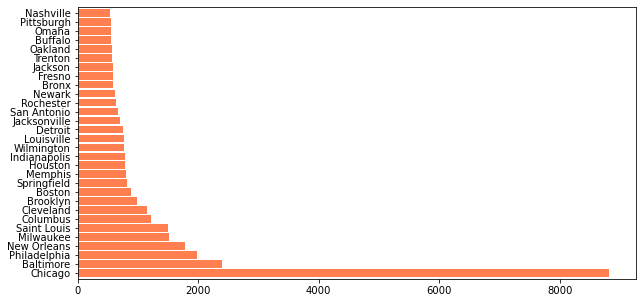

In [41]:
#extract time seires of the scores for each city_or_county for each week of the 4 years
df_incidents_cleaned['week'] = df_incidents_cleaned['date'].dt.week




/tmp/ipykernel_75083/2600639827.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



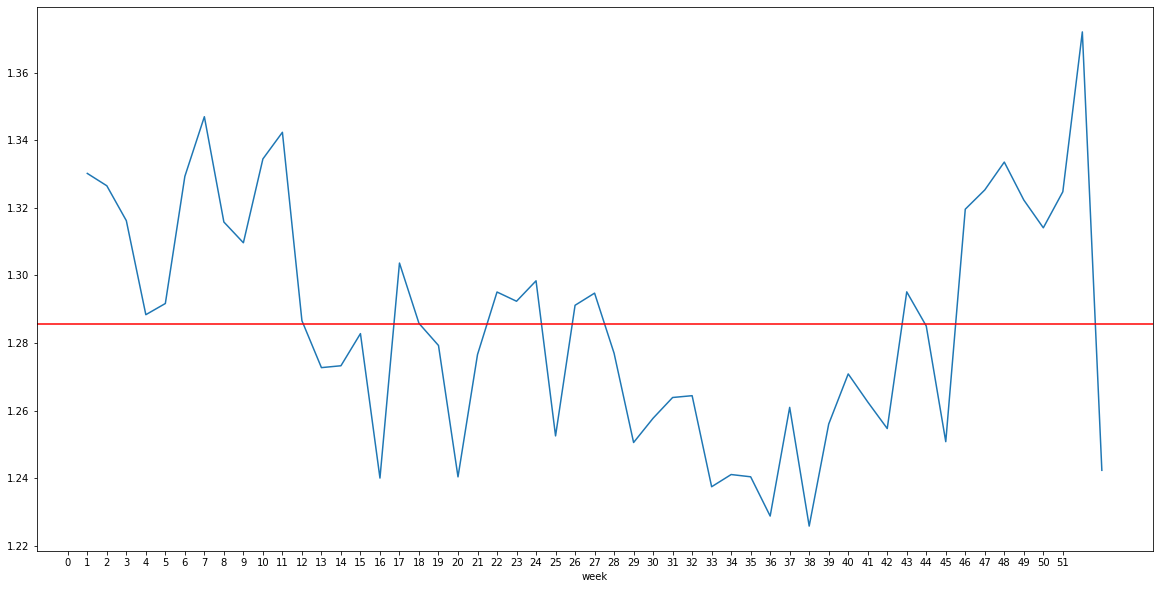

In [42]:
# get week column
df_incidents_cleaned['week'] = df_incidents_cleaned['date'].dt.week

# print the score by week with a plot
df_incidents_cleaned.groupby(['week'])['danger_score'].mean()

# plot the score by week
plt.figure(figsize=(20,10))
df_incidents_cleaned.groupby(['week'])['danger_score'].mean().plot()
# add tick on x for each week
plt.xticks(np.arange(0, 52, 1))
# add line on y axis where the score is much higher from the mean
# get points where mean is higher or lower than a certain threshold
# plot the mean in y xis for the whole period
plt.axhline(y=df_incidents_cleaned['danger_score'].mean(), color='r', linestyle='-')

plt.show()

# get the time series in a new dataframe
timeseries = df_incidents_cleaned.groupby(['week'])['danger_score'].mean()

week
1    1.330196
2    1.326540
3    1.316215
4    1.288376
5    1.291686
Name: danger_score, dtype: float64